## 在线性回归训练得到的模型中使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed = 666 # 随机生成的
X = 2 * np.random.random(size=100)  # [0.0, 1.0)
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html
# (b - a) * random_sample() + a
# x
# print(x)
y = X * 3. + 4. + np.random.normal(size=100) # 正态分布随机数序列
# 我们可以从每一行的角度来看，一行代表一个样本
# 我想起了了前面是一节是只有一个theta值，而我们也没有考虑所谓的y值
# 什么意思，前面是 plot_y = (plot_x - 2.5)**2-1
# 这里X是矩阵，我们的theta是一个一维向量，y=θ^T.dot(x)，这里x是列向量（特征向量），但是y始终是一个样本对应一个输出

In [3]:
X.shape # .shape本来就是np.array的成员函数吧

(100,)

In [4]:
X[0]

0.065658554913232248

In [5]:
X[1:]

array([ 1.03171162,  0.11997164,  1.38536269,  1.04419027,  0.48859994,
        0.97016069,  1.91525569,  1.72030434,  0.121976  ,  0.23089124,
        0.89849699,  0.16837972,  1.21036076,  1.97247123,  1.61539519,
        0.18632959,  1.68872122,  0.34254166,  1.17868033,  1.1230032 ,
        0.65064245,  0.80993245,  1.89270864,  0.71147432,  0.84914196,
        1.69903631,  1.83366523,  1.2945973 ,  0.12115091,  0.82663288,
        1.33970794,  1.90225472,  1.60301923,  1.48276511,  0.89225251,
        1.85887373,  1.70835777,  0.82327384,  1.3794992 ,  1.2604542 ,
        0.17497545,  1.85937345,  1.54877113,  0.53278679,  0.64962287,
        0.27388598,  0.34002861,  1.25577867,  0.85193397,  1.71178782,
        1.44611443,  0.69796748,  0.10845758,  1.54176985,  1.57647435,
        0.85795711,  0.45811275,  0.89461802,  0.92475737,  0.05140745,
        1.00249972,  1.41172571,  1.98430874,  1.649405  ,  0.74466021,
        0.66605341,  1.46194451,  1.87452375,  0.86584221,  1.09

In [6]:
X = X.reshape(-1, 1) # 得到了矩阵，1列，否则的话就是向量了，而向量是没有

In [7]:
X.shape

(100, 1)

In [8]:
X[0]

array([ 0.06565855])

In [9]:
X = np.array(X)

In [10]:
y.shape # 标记：一维数组

(100,)

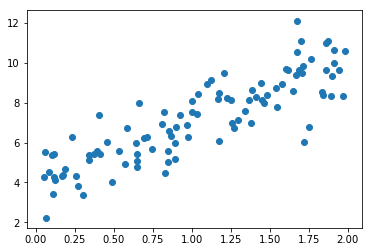

In [11]:
plt.scatter(X, y) # plt.plot() 是用于连线的
# plt.plot(X, y) # 曲折的连线啊
plt.show()

## 使用梯度下降法训练
![](https://i.loli.net/2018/02/11/5a80434a31e36.png)

In [12]:
# theta我们怎么求到的？
np.zeros(10).shape # 其实是1维数组，没有行列之分

(10,)

In [13]:
# theta是有一个初值，然后又一个梯度下降方向的变化值，然后得到新的theta值，直到极值
def J(theta, X_b, y): # y是实际值，X_b.dot(theta)得到的是线性回归模型的值
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except OverflowError:
        return float('inf')

In [14]:
# 对J求梯度，就是gradient了
def dJ(theta, X_b, y): # 为什么之前不要X_b和y呢，因为之前就没有模型啊，现在的话每一步都依赖特征啊
    res = np.empty(len(theta)) # 开辟空间
    res[0] = np.sum(X_b.dot(theta)-y) # 对每一个样本而言，np.sum对每一个样本行求和
    # for i in range(len(y)):
    for i in range(1, len(theta)):
       res[i] = (X_b.dot(theta)-y).dot(X_b[:, i]) # 取出第i个特征列
    return res * 2 / len(X_b) # len(X_b)==len(y)

In [15]:
# for i in range(len(y)):
#     print(i)
for i in range(1, 5): # 不包含5
    print(i)

1
2
3
4


In [16]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon = 1e-8):
    # 梯度下降法就是从一个初值出发
    theta = initial_theta # 这里的参数是一个向量了
    # 因为theta现在是高维向量了，无法绘制，所以跟踪theta_history也没意义了
    # 循环变化并比较是否到达极值点
    # while true: # 由于可能参数不恰当以及有限的计算资源，我们不应该使用while true，除非肯定可以结束
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        # 计算新的theta
        # theta = theta - eta * dJ(theta, X_b, y)
        theta = theta - eta * gradient
        # 比较新的值
        if np.abs(J(theta, X_b, y)-J(last_theta, X_b, y)) < epsilon:
            break
        i_iter += 1
        
    return theta

In [17]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [18]:
theta # 对应的就是截距和斜率
# 又遇到傻x了幸好坐远了

array([ 4.00259533,  3.04523224])

In [19]:
theta.shape # 可以发现theta是向量类型，部分行列向量

(2,)

### 封装我们的线性回归算法

使用梯度下降优化算法优化我们的模型

In [20]:
import sys
sys.path.append("../../")

In [22]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression() # 调用构造函数
lin_reg.fit_gd(X, y)

LinearRegression()

In [23]:
lin_reg.coef_

array([ 3.04523224])

In [24]:
lin_reg.interception_

4.0025953272312638